<a href="https://colab.research.google.com/github/saimathura/deeplearning-MDSC302/blob/main/22233_assignment_4_torchbuildneuralnetwork_MDSC_302(P).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# using a ternary operator in python to initialize the device


In [2]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"

)

In [3]:
print(f"using {device} Device")

using cuda Device


In [4]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [5]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [6]:
X = torch.rand(1,28,28, device = device)
logits = model(X)
pred_probab = nn.Softmax(dim = 1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted Class: {y_pred}")

Predicted Class: tensor([3], device='cuda:0')


In [7]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# This is how the orignal image will look


torch.Size([3, 28, 28])
tensor([[[0.7371, 0.5419, 0.9505,  ..., 0.9458, 0.5827, 0.5071],
         [0.4171, 0.1281, 0.4798,  ..., 0.5480, 0.7130, 0.0679],
         [0.6230, 0.5321, 0.1150,  ..., 0.0953, 0.7682, 0.0165],
         ...,
         [0.3930, 0.4609, 0.9470,  ..., 0.4017, 0.2010, 0.6757],
         [0.9422, 0.0906, 0.7061,  ..., 0.1052, 0.0450, 0.3228],
         [0.1370, 0.2769, 0.7046,  ..., 0.1789, 0.6491, 0.5099]],

        [[0.6687, 0.6024, 0.1113,  ..., 0.4232, 0.6549, 0.7176],
         [0.6861, 0.2914, 0.3376,  ..., 0.2814, 0.0811, 0.0676],
         [0.0221, 0.8536, 0.2339,  ..., 0.3872, 0.1273, 0.5198],
         ...,
         [0.3737, 0.9224, 0.2948,  ..., 0.8616, 0.5775, 0.1555],
         [0.4192, 0.9838, 0.1324,  ..., 0.7588, 0.1293, 0.3554],
         [0.7563, 0.4236, 0.5830,  ..., 0.2498, 0.9479, 0.6187]],

        [[0.3913, 0.9791, 0.0852,  ..., 0.9341, 0.4701, 0.9016],
         [0.1350, 0.6607, 0.3055,  ..., 0.4394, 0.6512, 0.5964],
         [0.8370, 0.9601, 0.4353, 

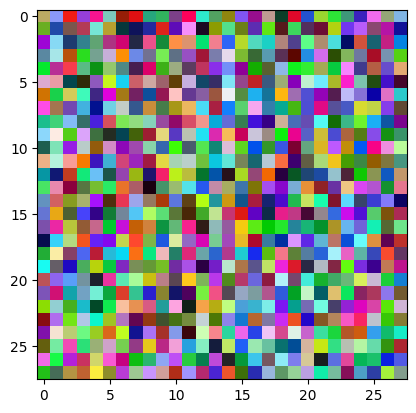

In [8]:
input_image = torch.rand(3,28,28)
print(input_image.size())
print(input_image)
plt.imshow(input_image.permute(1, 2, 0))
plt.show()

# This is how the flattened image will look.

torch.Size([3, 784])
tensor([[0.7371, 0.5419, 0.9505,  ..., 0.1789, 0.6491, 0.5099],
        [0.6687, 0.6024, 0.1113,  ..., 0.2498, 0.9479, 0.6187],
        [0.3913, 0.9791, 0.0852,  ..., 0.6473, 0.2318, 0.5533]])


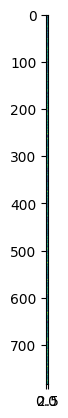

In [9]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())
print(flat_image)
plt.imshow(flat_image.permute(1,-2))
plt.show()

# nn.Linear
The linear layer is a module that applies a linear transformation on the input using its stored weights and biases.

torch.Size([3, 20])


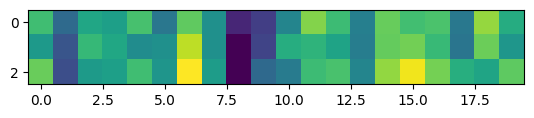

In [22]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())
plt.imshow(hidden1.detach().numpy())
plt.show()

Before ReLU: tensor([[ 0.2285, -0.3945,  0.0415, -0.0037,  0.2521, -0.3093,  0.3404, -0.1193,
         -0.8248, -0.6850, -0.1995,  0.4456,  0.2134, -0.2432,  0.3596,  0.2374,
          0.2711, -0.2980,  0.4909,  0.0958],
        [-0.0526, -0.5427,  0.1856,  0.0482, -0.1472, -0.1168,  0.5978, -0.1187,
         -1.0198, -0.6510,  0.0994,  0.1520,  0.0265, -0.2562,  0.3572,  0.3948,
          0.1902, -0.3187,  0.3728, -0.0761],
        [ 0.3675, -0.5898, -0.0398, -0.0045,  0.2265, -0.0815,  0.7789, -0.0256,
         -1.0169, -0.4080, -0.2686,  0.2122,  0.2627, -0.2038,  0.4840,  0.7371,
          0.4027,  0.1064,  0.0281,  0.3315]], grad_fn=<AddmmBackward0>)




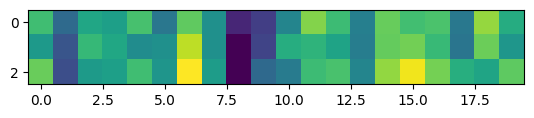

After ReLU: tensor([[0.2285, 0.0000, 0.0415, 0.0000, 0.2521, 0.0000, 0.3404, 0.0000, 0.0000,
         0.0000, 0.0000, 0.4456, 0.2134, 0.0000, 0.3596, 0.2374, 0.2711, 0.0000,
         0.4909, 0.0958],
        [0.0000, 0.0000, 0.1856, 0.0482, 0.0000, 0.0000, 0.5978, 0.0000, 0.0000,
         0.0000, 0.0994, 0.1520, 0.0265, 0.0000, 0.3572, 0.3948, 0.1902, 0.0000,
         0.3728, 0.0000],
        [0.3675, 0.0000, 0.0000, 0.0000, 0.2265, 0.0000, 0.7789, 0.0000, 0.0000,
         0.0000, 0.0000, 0.2122, 0.2627, 0.0000, 0.4840, 0.7371, 0.4027, 0.1064,
         0.0281, 0.3315]], grad_fn=<ReluBackward0>)


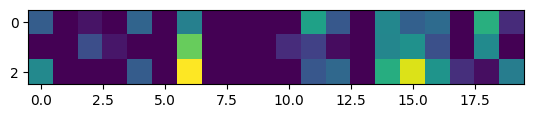

In [23]:
print(f"Before ReLU: {hidden1}\n\n")
plt.imshow(hidden1.detach().numpy())
plt.show()
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")
plt.imshow(hidden1.detach().numpy())
plt.show()

In [25]:
import torchvision

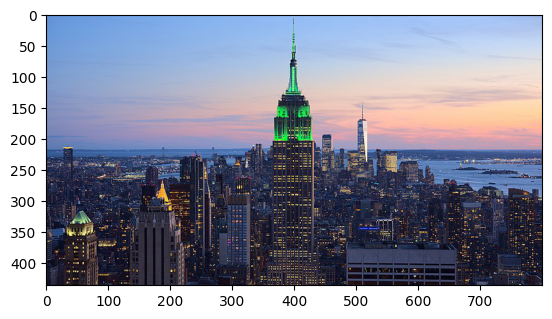

In [26]:
from PIL import Image

# Load the image
image = Image.open('/content/View_of_Empire_State_Building_from_Rockefeller_Center_New_York_City_dllu_(cropped).jpg')

plt.imshow(image)
plt.show()

# now the image is in tensor

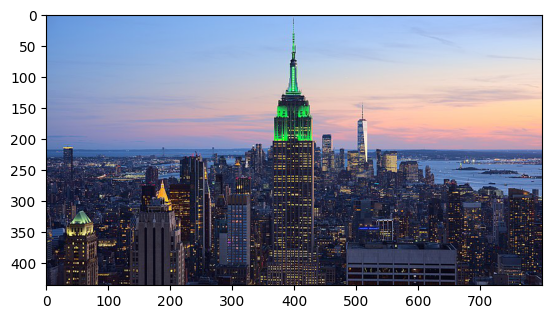

In [27]:
# Convert the image to a PyTorch tensor
transform = torchvision.transforms.ToTensor()
image = transform(image)

# Display the image
plt.imshow(image.permute(1, 2, 0))
plt.show()

# image after flattening


torch.Size([3, 348800])
tensor([[0.3765, 0.3765, 0.3765,  ..., 0.3294, 0.2196, 0.2157],
        [0.5608, 0.5608, 0.5608,  ..., 0.3333, 0.2275, 0.2235],
        [0.8275, 0.8275, 0.8275,  ..., 0.4157, 0.3098, 0.3059]])


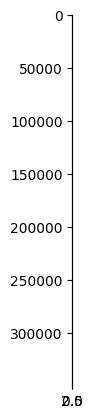

In [28]:
flatten = nn.Flatten()
flat_image = flatten(image)
print(flat_image.size())
print(flat_image)
plt.imshow(flat_image.permute(1,-2))
plt.show()

# Image after doing a Linear filter pass through a layer

torch.Size([3, 20])


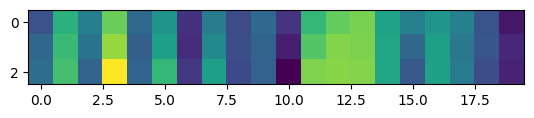

In [30]:
layer1 = nn.Linear(in_features=800*436, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())
plt.imshow(hidden1.detach().numpy())
plt.show()

# NOw lets apply RELU

Before ReLU: tensor([[-0.2890,  0.3034, -0.0153,  0.5161, -0.1546,  0.1178, -0.4602, -0.0297,
         -0.3312, -0.1582, -0.4518,  0.3494,  0.4991,  0.5546,  0.2049, -0.0080,
          0.1230, -0.0095, -0.2866, -0.5909],
        [-0.1627,  0.3602, -0.0871,  0.6186, -0.2182,  0.1900, -0.4861,  0.0522,
         -0.3142, -0.1899, -0.5586,  0.4487,  0.5787,  0.5570,  0.2255, -0.1739,
          0.1925, -0.0714, -0.2725, -0.5178],
        [-0.1329,  0.4084, -0.1916,  0.8664, -0.1862,  0.3449, -0.4379,  0.1872,
         -0.3413, -0.1999, -0.6881,  0.5651,  0.5922,  0.5761,  0.2323, -0.2563,
          0.2015, -0.0500, -0.3191, -0.5419]], grad_fn=<AddmmBackward0>)




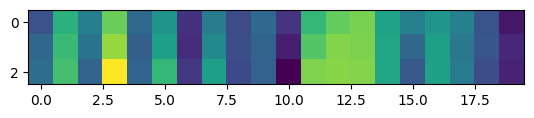

After ReLU: tensor([[0.0000, 0.3034, 0.0000, 0.5161, 0.0000, 0.1178, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.3494, 0.4991, 0.5546, 0.2049, 0.0000, 0.1230, 0.0000,
         0.0000, 0.0000],
        [0.0000, 0.3602, 0.0000, 0.6186, 0.0000, 0.1900, 0.0000, 0.0522, 0.0000,
         0.0000, 0.0000, 0.4487, 0.5787, 0.5570, 0.2255, 0.0000, 0.1925, 0.0000,
         0.0000, 0.0000],
        [0.0000, 0.4084, 0.0000, 0.8664, 0.0000, 0.3449, 0.0000, 0.1872, 0.0000,
         0.0000, 0.0000, 0.5651, 0.5922, 0.5761, 0.2323, 0.0000, 0.2015, 0.0000,
         0.0000, 0.0000]], grad_fn=<ReluBackward0>)


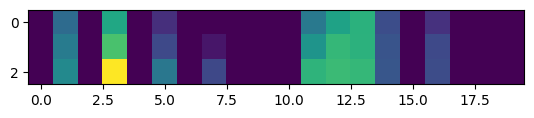

In [31]:
print(f"Before ReLU: {hidden1}\n\n")
plt.imshow(hidden1.detach().numpy())
plt.show()
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")
plt.imshow(hidden1.detach().numpy())
plt.show()

#n.Sequential
nn.Sequential is an ordered container of modules. The data is passed through all the modules in the same order as defined. You can use sequential containers to put together a quick network like seq_modules.

In [33]:
layer1 = nn.Linear(in_features=28*28, out_features=20)

In [34]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20,10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

#nn.Softmax
The last linear layer of the neural network returns logits - raw values in [-infty, infty] - which are passed to the nn.Softmax module. The logits are scaled to values [0, 1] representing the model’s predicted probabilities for each class. dim parameter indicates the dimension along which the values must sum to 1.



In [35]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

#Model Parameters
Many layers inside a neural network are parameterized, i.e. have associated weights and biases that are optimized during training. Subclassing nn.Module automatically tracks all fields defined inside your model object, and makes all parameters accessible using your model’s parameters() or named_parameters() methods.

In this example, we iterate over each parameter, and print its size and a preview of its values.

In [36]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0012, -0.0231,  0.0231,  ..., -0.0131, -0.0049,  0.0258],
        [ 0.0112, -0.0160,  0.0327,  ...,  0.0144,  0.0342,  0.0160]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0160, -0.0092], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0180, -0.0105, -0.0298,  ..., -0.0004, -0.0401, -0.0056],
        [-0.0423, -0.0003,  0.0103,  ...,  0.0072, -0.0208,  0.0193]],
       device='cuda:0', grad_fn=<Sl